In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [7]:
import pandas as pd

In [8]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


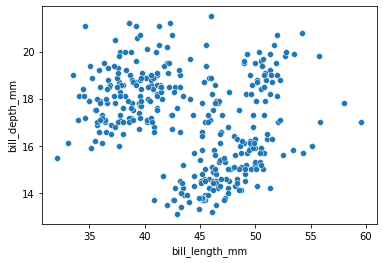

In [ ]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

In [ ]:
palette = {'Adelie': 'blue', 'Gentoo': 'yellow', 'Chinstrap': 'green'}

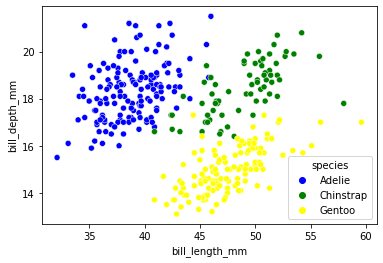

In [ ]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette)

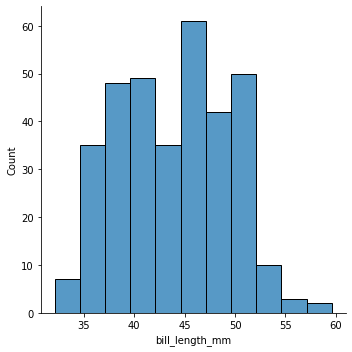

In [ ]:
sns.displot(data=penguins, x='bill_length_mm')

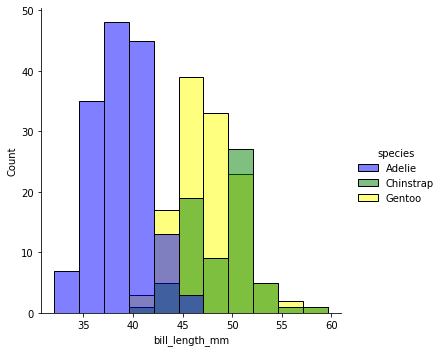

In [ ]:
sns.displot(data=penguins, x='bill_length_mm', hue='species', palette=palette)

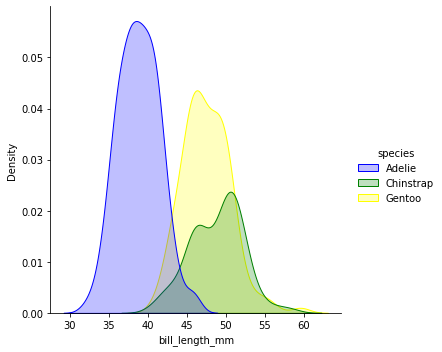

In [ ]:
sns.displot(data=penguins, x='bill_length_mm', hue='species', palette=palette, kind='kde', fill=True)

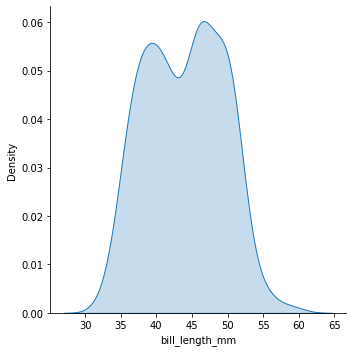

In [ ]:
sns.displot(data=penguins, x='bill_length_mm', palette=palette, kind='kde', fill=True)

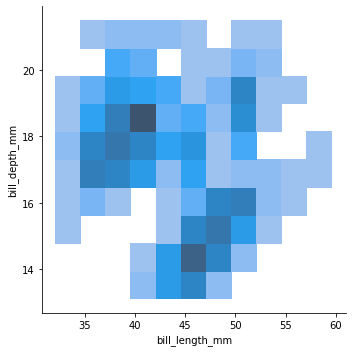

In [ ]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

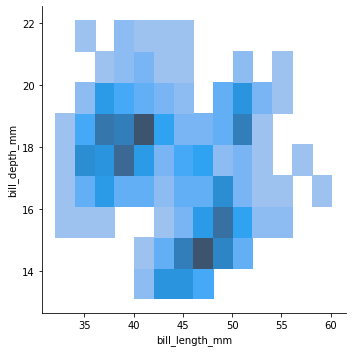

In [ ]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', binwidth=(2, 1))

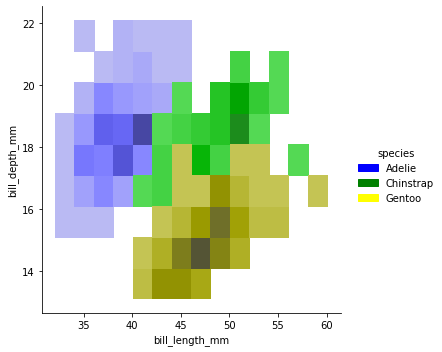

In [ ]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', binwidth=(2, 1), hue='species', palette=palette)

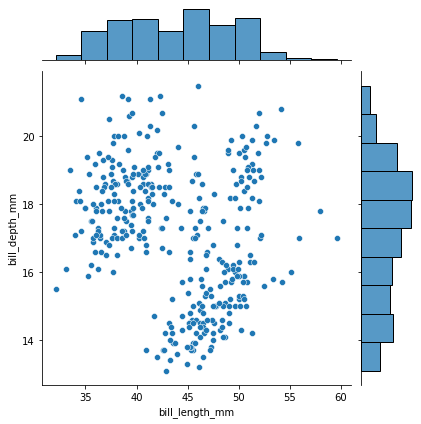

In [ ]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

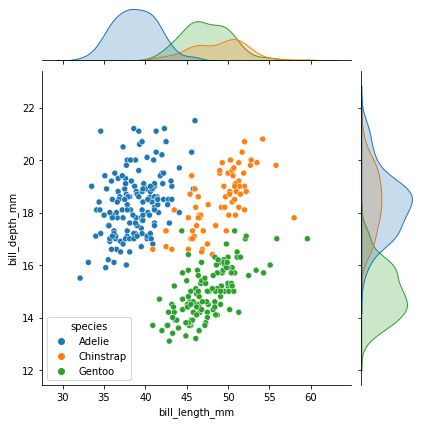

In [ ]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

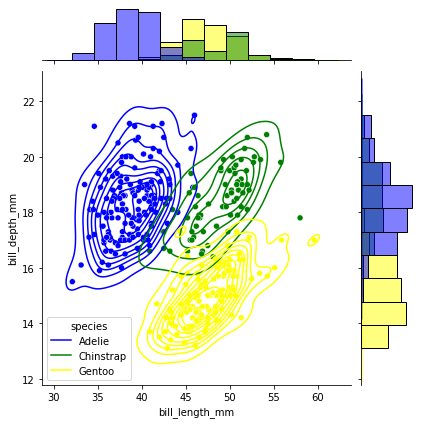

In [ ]:
g = sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

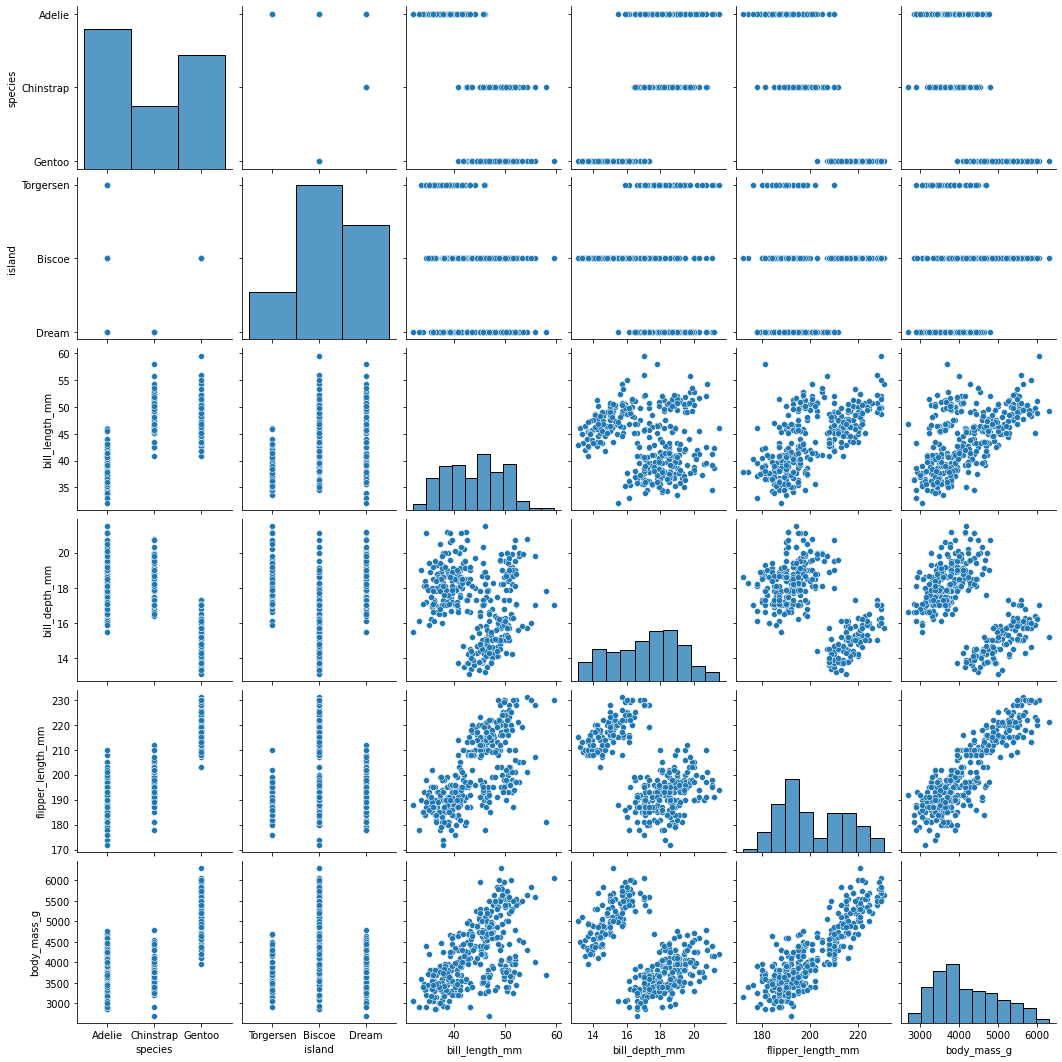

In [ ]:
sns.pairplot(data=penguins, vars=penguins.columns[0:6])

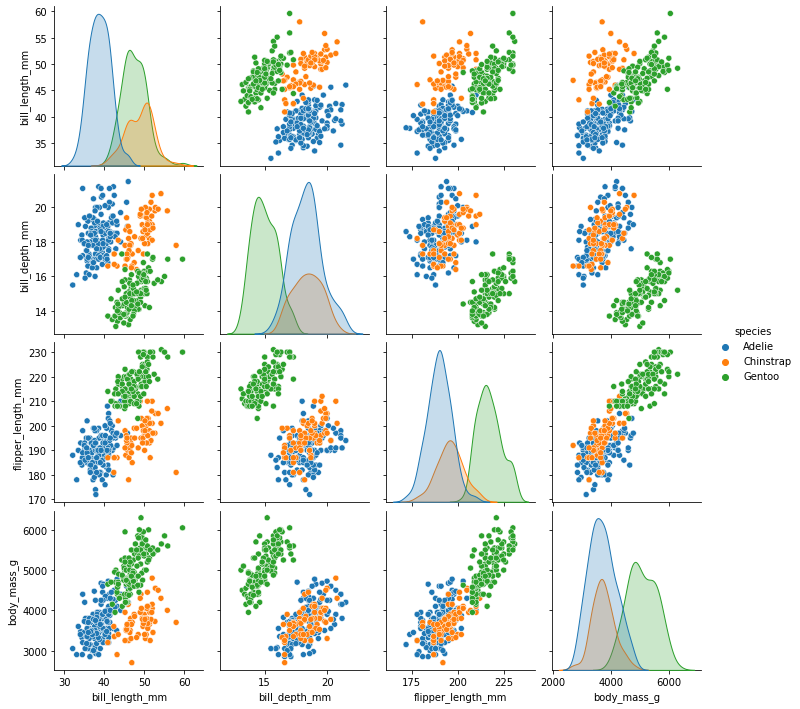

In [ ]:
sns.pairplot(data=penguins,hue='species')

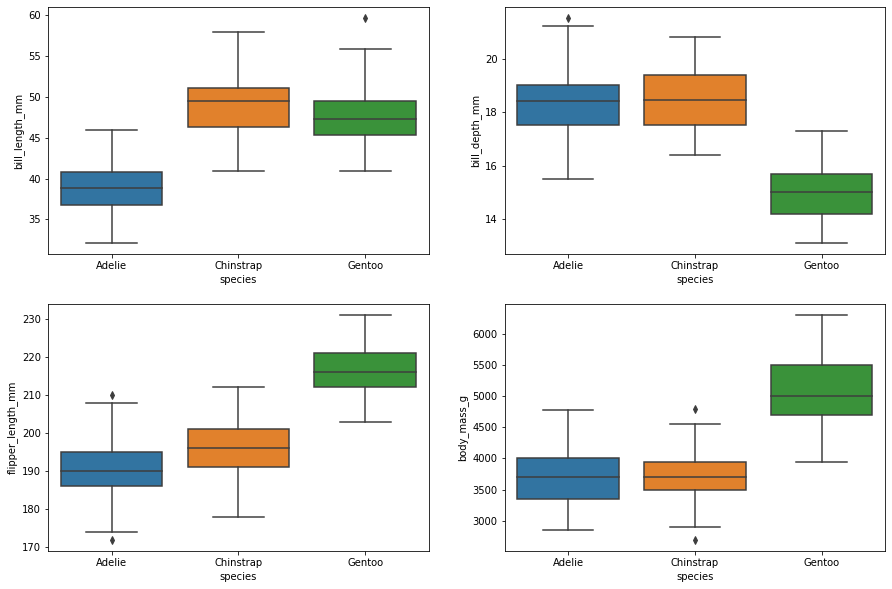

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='bill_length_mm',data=penguins)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='bill_depth_mm',data=penguins)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='flipper_length_mm',data=penguins)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='body_mass_g',data=penguins)
plt.show()

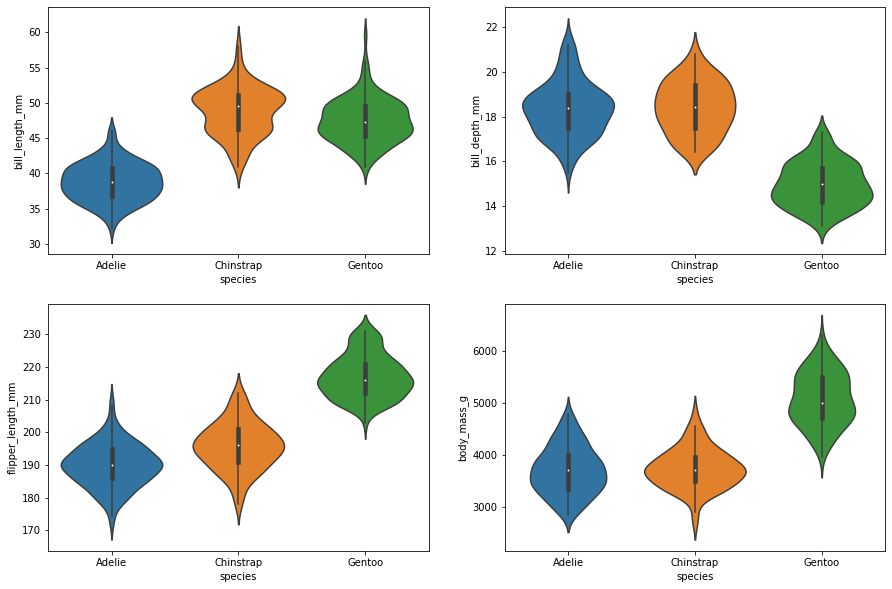

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='bill_length_mm',data=penguins)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='bill_depth_mm',data=penguins)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='flipper_length_mm',data=penguins)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='body_mass_g',data=penguins)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


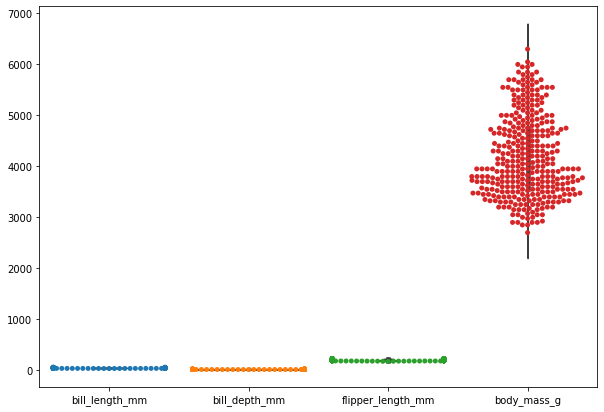

In [ ]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=penguins)
sns.swarmplot( data=penguins)


In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [9]:
# set up variables for decision tree
penguins_full = penguins.dropna()

In [10]:
# prediction target
y = penguins_full.species

In [11]:
# feature selection
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X = penguins_full[features]

In [12]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

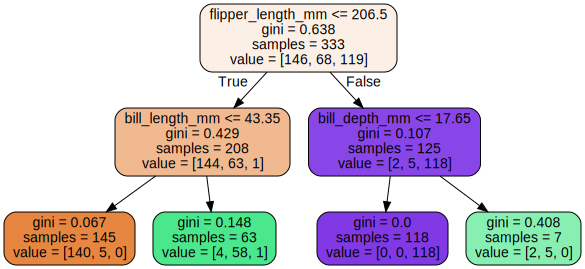

In [13]:
export_graphviz(model, out_file='penguins.dot', feature_names=features, rounded=True, filled=True)
Source.from_file('penguins.dot')

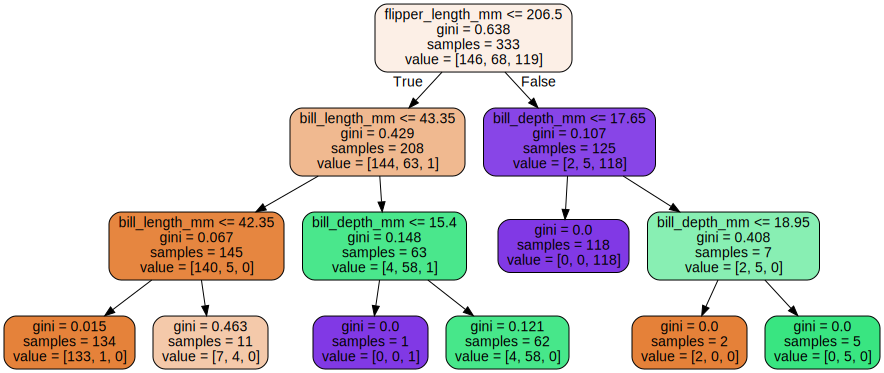

In [14]:
model = DecisionTreeClassifier(max_depth = 3, random_state=42)
model.fit(X, y)
export_graphviz(model, out_file='penguins.dot', feature_names=features, rounded=True, filled=True)
Source.from_file('penguins.dot')

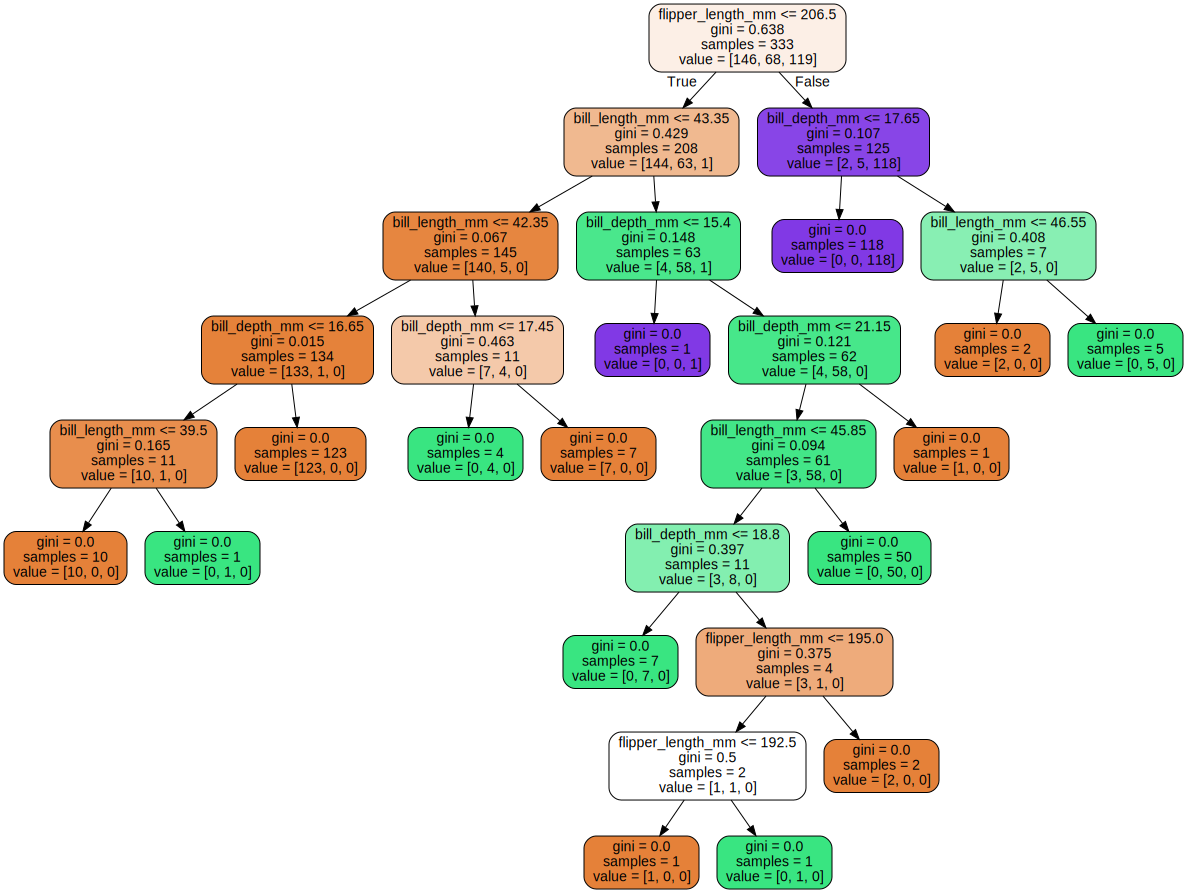

In [15]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
export_graphviz(model, out_file='penguins.dot', feature_names=features, rounded=True, filled=True)
Source.from_file('penguins.dot')

**Sau khi sử dùng một vài hyperparameter max_depth, em nhận thấy rằng khi max_depth càng lớn thì mô hình sẽ càng phức tạp, khi đó các dữ liệu không bị lẫn vào nhau mà tách biệt rõ ràng, tuy nhiên điều này dẫn đến mô hình quá khớp nên rất khó phân loại dữ liệu, và chỉ cần một thay đổi về thông số thì mô hình sẽ không còn chính xác nữa. Còn đối với max_depth càng nhỏ thì mô hình sẽ càng đơn giản, dễ tổng quát hóa, giúp ta dễ dàng phân loại dữ liệu và có độ chính xác cao hơn.**


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train

,bill_length_mm,bill_depth_mm,flipper_length_mm
44,37.0,16.9,185.0
318,48.4,14.4,203.0
110,38.1,16.5,198.0
161,51.3,19.9,198.0
199,49.0,19.6,212.0
...,...,...,...
194,50.9,19.1,196.0
77,37.2,19.4,184.0
112,39.7,17.7,193.0
277,45.5,15.0,220.0


In [19]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm
30,39.5,16.7,178.0
317,46.9,14.6,222.0
79,42.1,19.1,195.0
201,49.8,17.3,198.0
63,41.1,18.2,192.0
...,...,...,...
15,36.6,17.8,185.0
231,49.0,16.1,216.0
233,48.4,14.6,213.0
87,36.9,18.6,189.0


In [20]:
y_train

44        Adelie
318       Gentoo
110       Adelie
161    Chinstrap
199    Chinstrap
         ...    
194    Chinstrap
77        Adelie
112       Adelie
277       Gentoo
108       Adelie
Name: species, Length: 223, dtype: object

In [21]:
y_test

30        Adelie
317       Gentoo
79        Adelie
201    Chinstrap
63        Adelie
         ...    
15        Adelie
231       Gentoo
233       Gentoo
87        Adelie
159    Chinstrap
Name: species, Length: 110, dtype: object

In [22]:
train_test_split(y, shuffle=False)

[0      Adelie
 1      Adelie
 2      Adelie
 4      Adelie
 5      Adelie
         ...  
 251    Gentoo
 252    Gentoo
 253    Gentoo
 254    Gentoo
 255    Gentoo
 Name: species, Length: 249, dtype: object, 256    Gentoo
 257    Gentoo
 258    Gentoo
 259    Gentoo
 260    Gentoo
         ...  
 338    Gentoo
 340    Gentoo
 341    Gentoo
 342    Gentoo
 343    Gentoo
 Name: species, Length: 84, dtype: object]

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
model.fit(X_train, y_train)  
Y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test,Y_pred)

In [26]:
print(accuracy)

0.990909090909091
